In [1]:
# standard imports

import numpy as np

import ROOT
import root_numpy as rn

Welcome to JupyROOT 6.22/08


In [2]:
# number of measurements and number of experiments
Nmeas = 1
Nexp = 1000000

# experimental value of mu

mu_exp = 0

# fixed value of sigma

sig = 2

In [3]:
# creating ROOT histograms

hist2d = ROOT.TH2D('hist2D', 'hist2D',\
                201, -10, 10,\
                201, -10, 10)

hist1d = ROOT.TH1D('hist1D', 'hist1D',\
                  201, -10, 10)

In [4]:
# loop through different values of mu_true

i = -100
mu_trues = []
mu_bests = []
while i <= 100:
    
    mu_true = i/10
    
    # generating Nexp * Nmeas samples
    samps = np.random.normal(mu_true, sig, size=(Nexp,Nmeas))
    
    # calculating the average for each experiment
    mu_best = np.sum(samps, axis=1) / Nmeas
    
    mu_bests.append(mu_best)
    
    # 1 value of mu_true for each experiment
    mu_trues.append(mu_true * np.ones(Nexp))
    
    i += 1

mu_trues = np.array(mu_trues).flatten()
mu_bests = np.array(mu_bests).flatten()    

# filling the histogram
rn.fill_hist(hist2d, np.array([mu_trues, mu_bests]).transpose())

/home/ryan/anaconda3/envs/root_env/lib/python3.9/site-packages/root_numpy/_hist.py:70: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return _librootnumpy.fill_h2(


In [5]:
# doing 1D histogram stuff here

# which bin in 2D histogram on y axis matches
ibin = hist2d.GetYaxis().FindBin(mu_exp)

# fill 1D histogram with slice from 2D corresponding to measurement

i = 0

while i < 201:
    
    hist1d.SetBinContent(i+1, hist2d.GetBinContent(i+1, ibin))
    i += 1
    
hist1d.Scale(1./hist1d.Integral())

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0


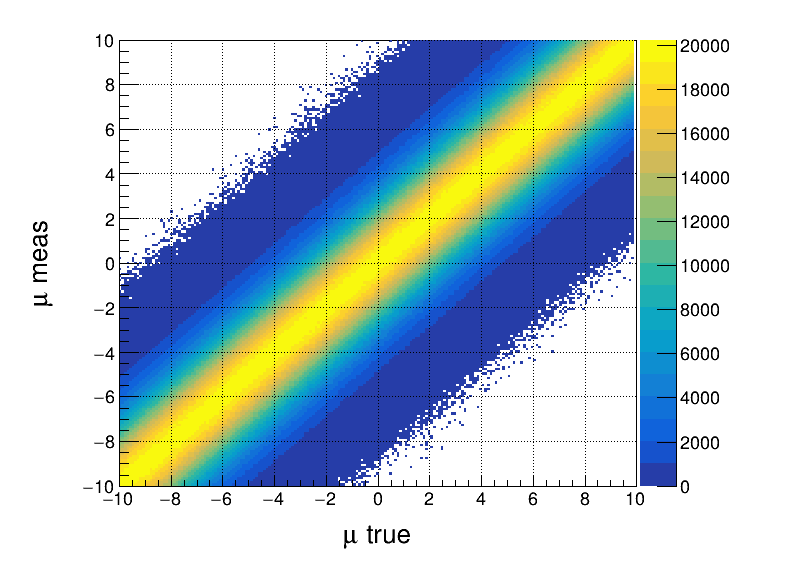

In [7]:
# canvas formatting
ROOT.gStyle.SetOptTitle(0)
ROOT.gStyle.SetOptStat(0)

# 2D hist canvas
can0 = ROOT.TCanvas('c0','c0', 800, 600)

hlo = 0.15
hhi = 0.2
hbo = 0.15
hto = 0.07
# formatting options
can0.SetLeftMargin(hlo)
can0.SetRightMargin(hhi)
can0.SetBottomMargin(hbo)
can0.SetTopMargin(hto)
can0.SetGridx()
can0.SetGridy()
can0.cd()
can0.Draw()

# drawing histogram

hist2d.Draw('colz')
hist2d.GetXaxis().CenterTitle()
hist2d.GetXaxis().SetTitleSize(0.05)
hist2d.GetYaxis().CenterTitle()
hist2d.GetYaxis().SetTitleSize(0.05)
hist2d.GetXaxis().SetTitleOffset(1.1)
hist2d.GetYaxis().SetTitleOffset(1.2)
hist2d.GetXaxis().SetTitle('#mu true')
hist2d.GetYaxis().SetTitle('#mu meas')

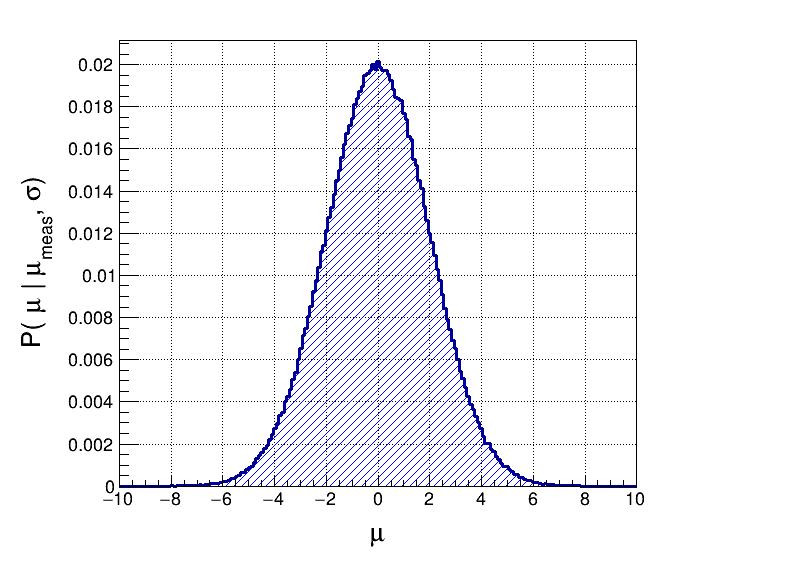

In [8]:
# 1D hist canvas

can1 = ROOT.TCanvas('c1','c1', 800, 600)
# formatting options
can0.SetLeftMargin(hlo)
can0.SetRightMargin(hhi)
can0.SetBottomMargin(hbo)
can0.SetTopMargin(hto)
can0.SetGridx()
can0.SetGridy()
can0.cd()
can0.Draw()

hist1d.SetLineColor(ROOT.kBlue+2)
hist1d.SetLineWidth(3)
hist1d.SetFillColor(ROOT.kBlue)
hist1d.SetFillStyle(3004)
hist1d.Draw('hist')

hist1d.GetXaxis().CenterTitle()
hist1d.GetXaxis().SetTitleSize(0.05)
hist1d.GetYaxis().CenterTitle()
hist1d.GetYaxis().SetTitleSize(0.05)
hist1d.GetXaxis().SetTitleOffset(1.1)
hist1d.GetYaxis().SetTitleOffset(1.3)
hist1d.GetXaxis().SetTitle('#mu')
hist1d.GetYaxis().SetTitle('P( #mu | #mu_{meas}, #sigma)')